In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
train = pd.read_csv('/content/HousePrices.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [ ]:
train.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.describe()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,2073.000000,2073.000000,1753.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,...,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,916.132176,60.556199,72.056475,10717.853353,6.233478,5.835022,1969.445731,1986.617463,101.875668,437.949349,...,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,493.014670,159.924810,27.987475,9215.982306,1.517115,1.360214,30.222647,20.432694,179.169217,448.051119,...,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,519.000000,20.000000,60.000000,7620.000000,5.000000,5.000000,1950.000000,1970.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,932.000000,50.000000,70.000000,9492.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,381.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,1302.000000,70.000000,83.000000,11601.000000,7.000000,7.000000,1999.000000,2004.000000,161.500000,708.000000,...,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1820.000000,7080.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2023.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Univariate Analysis

In [ ]:
train.skew()

<ipython-input-6-1d3a3c99b9d6>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.skew()


Id                     -0.033712
Dwell_Type             40.872292
LotFrontage             3.448015
LotArea                11.239413
OverallQual             0.196350
OverallCond             0.649335
YearBuilt              -0.516261
YearRemodAdd           -0.579862
MasVnrArea              2.576900
BsmtFinSF1              1.468890
BsmtFinSF2              4.027937
BsmtUnfSF               0.924212
TotalBsmtSF             1.156452
1stFlrSF                1.247346
2ndFlrSF                0.808616
LowQualFinSF            8.652420
GrLivArea               1.169644
BsmtFullBath            0.619665
BsmtHalfBath            4.169617
FullBath               -0.045613
HalfBath                0.674001
BedroomAbvGr            0.123019
KitchenAbvGr            4.312676
TotRmsAbvGrd            0.721687
Fireplaces              0.625415
GarageYrBlt            -0.700172
GarageCars             -0.373705
GarageArea              0.135391
WoodDeckSF              1.763668
OpenPorchSF             2.257522
EnclosedPo

<ipython-input-7-b4b7a431297e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Dwell_Type'], kde = True)


<Axes: xlabel='Dwell_Type', ylabel='Density'>

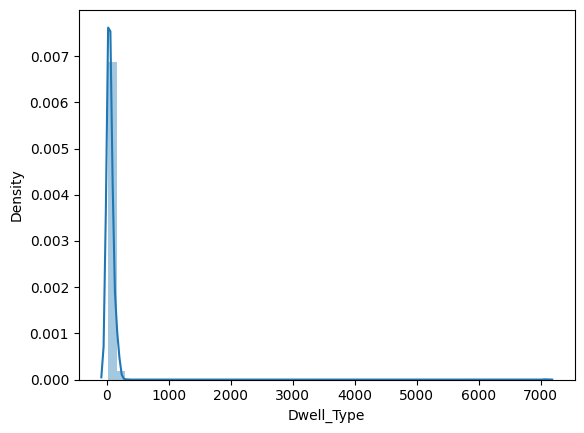

In [ ]:
sns.distplot(train['Dwell_Type'], kde = True)

<ipython-input-8-5d5fd46d555d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['LotFrontage'], kde = True)


<Axes: xlabel='LotFrontage', ylabel='Density'>

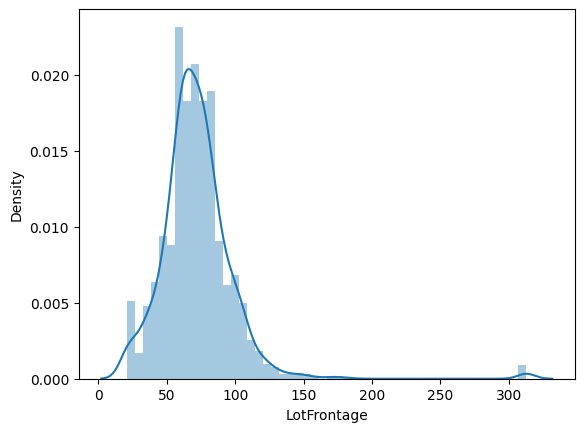

In [ ]:
sns.distplot(train['LotFrontage'], kde = True)

<Axes: >

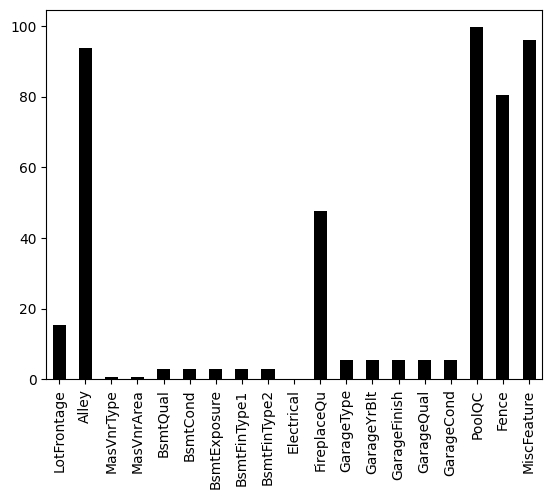

In [ ]:
missing_percentage = ((train.isnull().sum())/len(train)*100)
missing_percentage = missing_percentage[missing_percentage>0]
missing_percentage.plot(kind='bar',color='black')

In [ ]:
train.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

# Bi variate analysis

<ipython-input-14-e72199e7519f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


<Axes: >

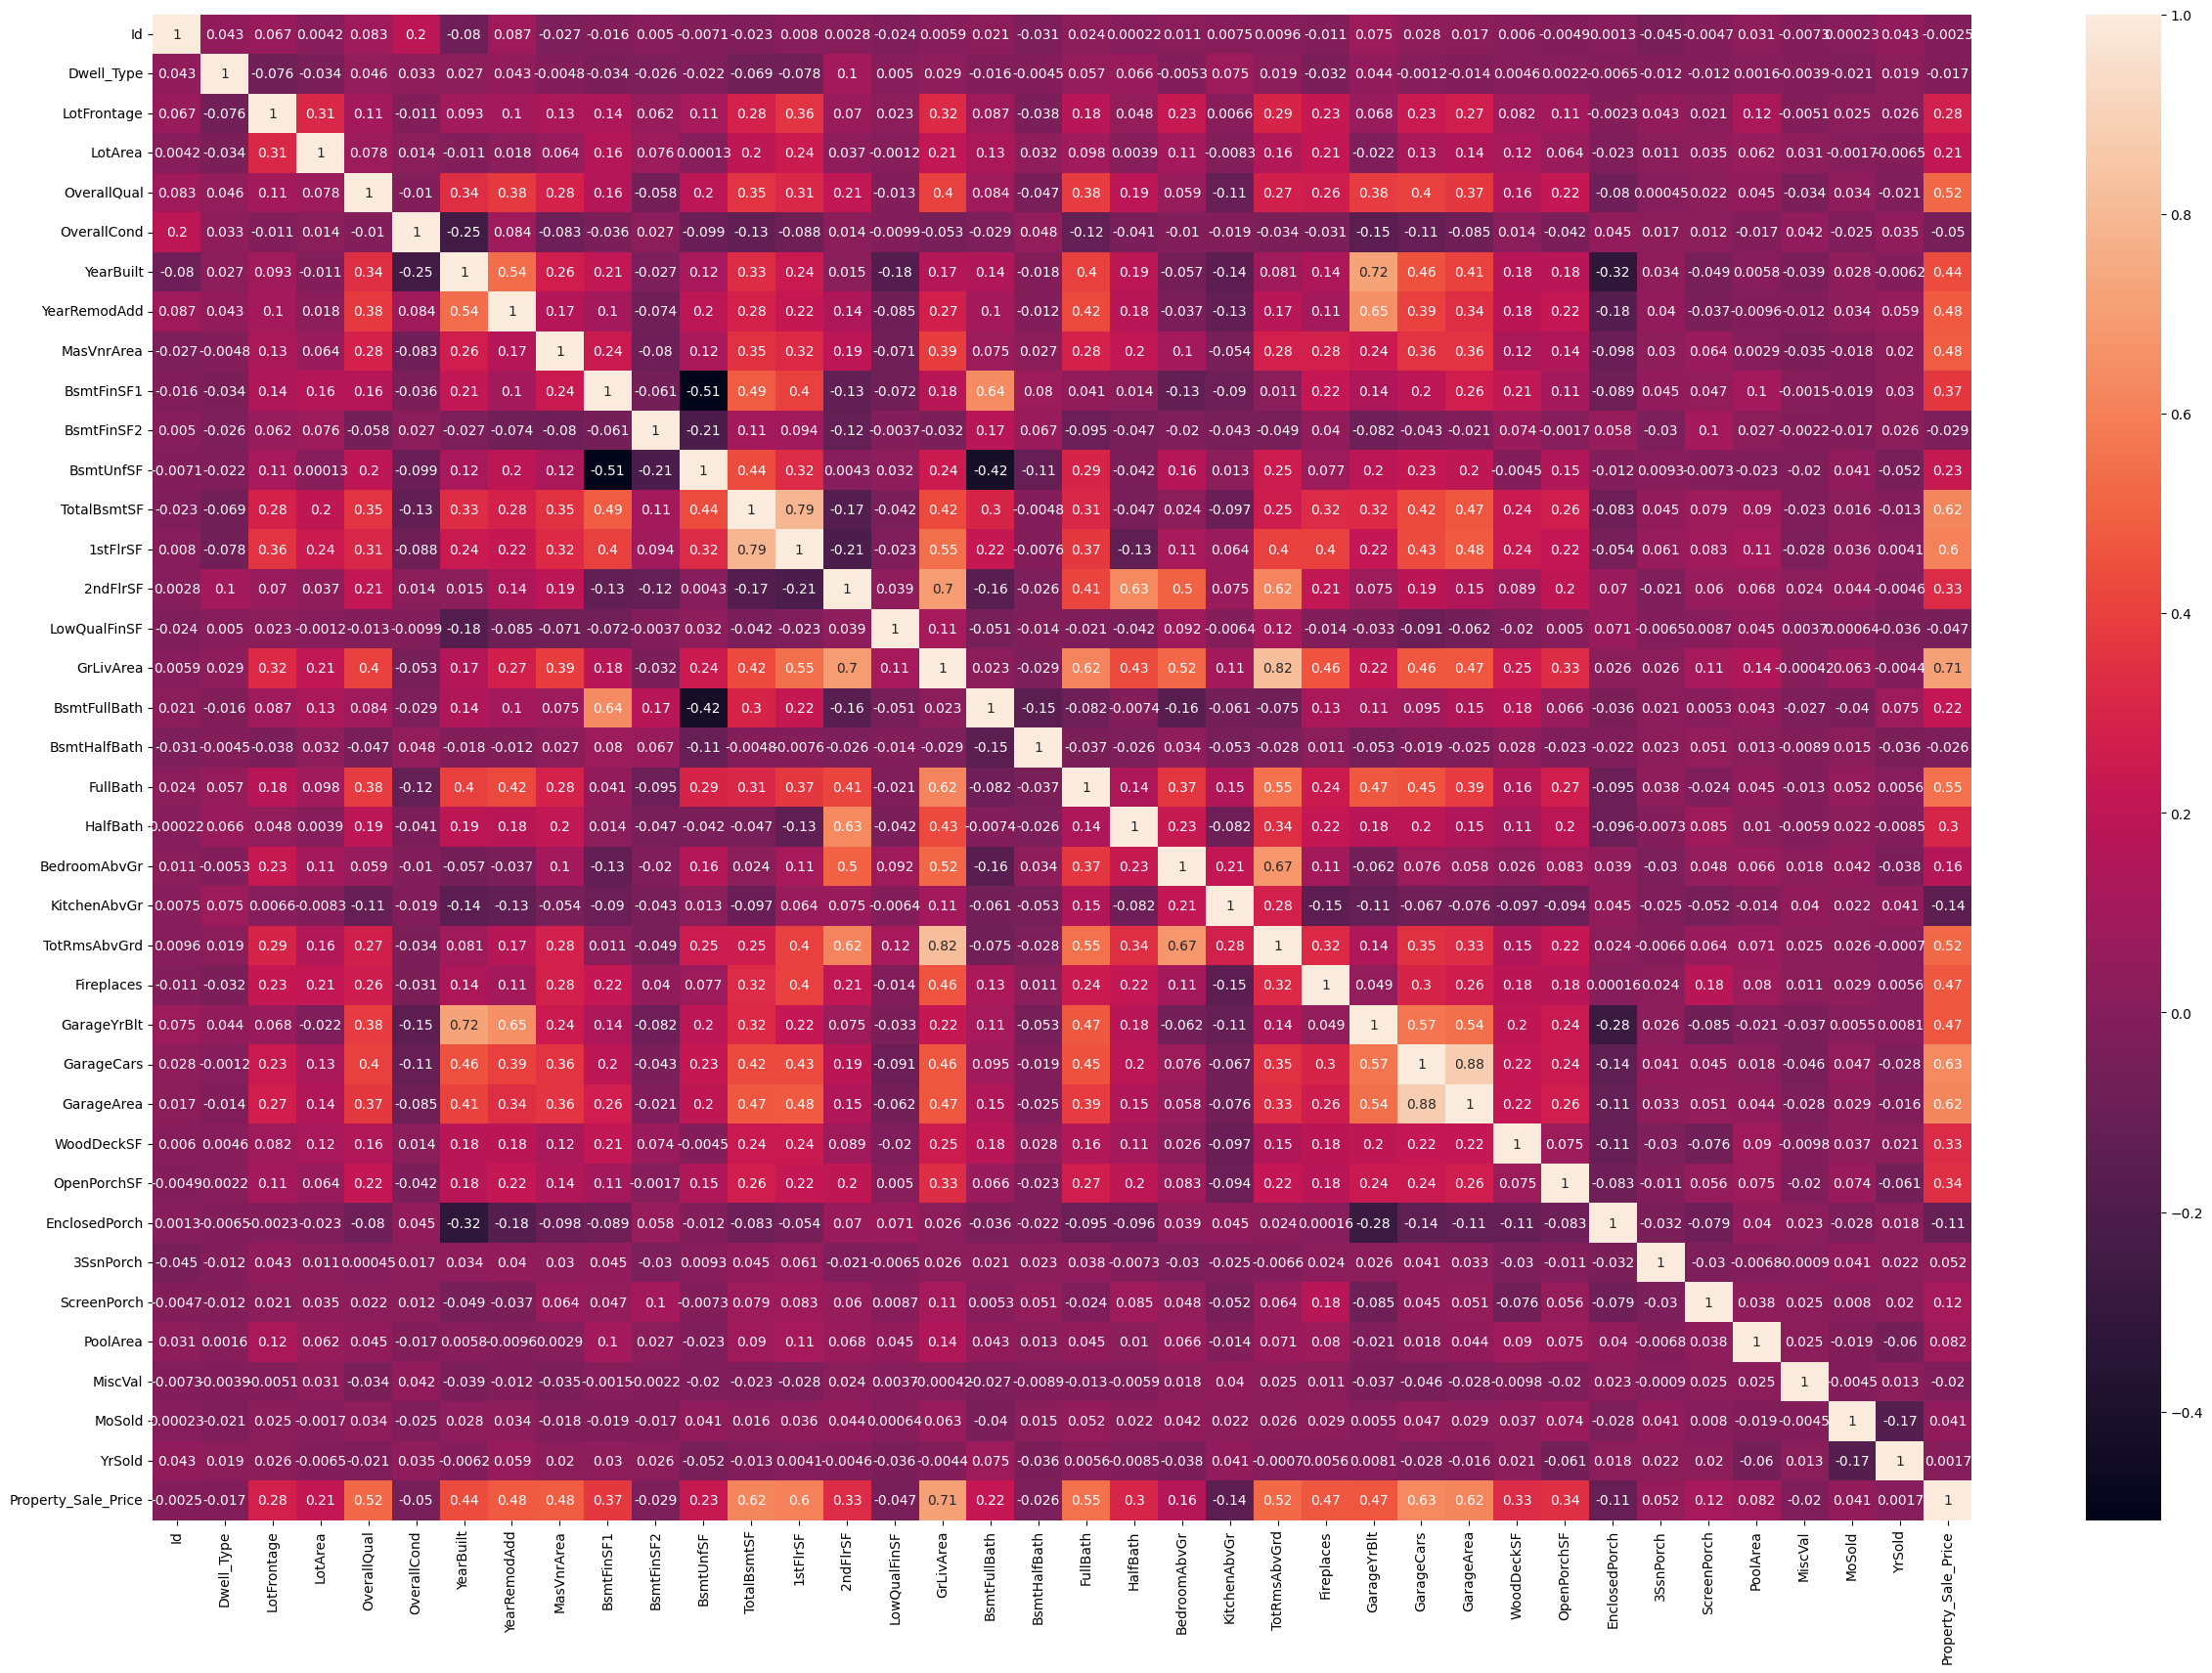

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(train.corr(),annot=True)

In [ ]:
def display_low_correlation_with_target(train, target_column, threshold=0.3):
    correlations = train.corr()[target_column]
    low_corr_columns = correlations[(correlations < threshold) & (correlations > -threshold)].index.tolist()
    print(f"Columns with correlation less than {threshold} and greater than {-threshold} with the target column '{target_column}':")
    print(low_corr_columns)

    return low_corr_columns

low_corr_columns = display_low_correlation_with_target(train, 'Property_Sale_Price', threshold=0.2)


Columns with correlation less than 0.2 and greater than -0.2 with the target column 'Property_Sale_Price':
['Id', 'Dwell_Type', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


<ipython-input-15-6ae6902719d5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = train.corr()[target_column]


In [ ]:
def corr_with_column(train,target_col,columns_of_interest):
    correlations = train[columns_of_interest].corrwith(train[target_col])
    print(f"correlation for {'target_col'} and specified columns")
    return correlations

In [ ]:
corr_with_column(train,'Property_Sale_Price',low_corr_columns)

correlation for target_col and specified columns


Id              -0.002491
Dwell_Type      -0.017399
OverallCond     -0.049926
BsmtFinSF2      -0.029042
LowQualFinSF    -0.046975
BsmtHalfBath    -0.026010
BedroomAbvGr     0.160748
KitchenAbvGr    -0.144456
EnclosedPorch   -0.108530
3SsnPorch        0.052394
ScreenPorch      0.115157
PoolArea         0.081913
MiscVal         -0.020430
MoSold           0.041053
YrSold           0.001740
dtype: float64

In [ ]:
train.drop(['Id','Dwell_Type','OverallCond','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','EnclosedPorch','3SsnPorch',
          'ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'],axis=1,inplace=True)

Encoding

In [ ]:
def replace_null_values(df):
    for column in df.columns[df.isnull().any()]:
        if df[column].dtype =='object':
            mode = df[column].mode().iloc[0]
            df[column].fillna(mode,inplace=True)
        elif df[column].dtype=='float':
            median = df[column].median()
            df[column].fillna(median,inplace=True)
    return df

In [ ]:
replace_null_values(train)

,Zone_Class,LotFrontage,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,Property_Sale_Price
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2,548,TA,TA,Y,0,61,WD,Normal,208500
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,2,460,TA,TA,Y,298,0,WD,Normal,181500
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2,608,TA,TA,Y,0,42,WD,Normal,223500
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,3,642,TA,TA,Y,0,35,WD,Abnorml,140000
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,3,836,TA,TA,Y,192,84,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,RL,70.0,8755,Pave,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,...,2,390,TA,TA,Y,0,0,WD,Normal,214000
2069,RL,63.0,7711,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,...,0,0,TA,TA,N,321,0,Oth,Abnorml,150000
2070,RL,313.0,25000,Pave,Reg,Low,AllPub,Inside,Gtl,Mitchel,...,2,576,TA,TA,P,0,0,WD,Normal,143000
2071,RL,52.0,14375,Pave,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,...,2,525,TA,TA,Y,0,118,COD,Abnorml,137500


In [ ]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

for column in train.columns:
    if train[column].dtype=='object':
        train[column] = le.fit_transform(train[column])

splitting

In [ ]:
x = train.drop(['Property_Sale_Price'],axis=1)
y = train['Property_Sale_Price']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

linear regression

In [ ]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)


LinearRegression()

In [ ]:
print(lr.coef_)

[-1.72421859e+03 -9.97723417e+01  2.61369938e-01  2.62387266e+04
 -1.66150661e+03  2.82819835e+03 -3.25401063e+04  7.98942647e+02
  3.73340912e+03  4.89071450e+02 -5.50616041e+02 -8.53569599e+03
 -5.33435413e+03 -1.70581937e+03  2.34018184e+03  3.36118834e+01
  1.47538311e+02  2.49191711e+03  7.93297592e+03 -1.16577671e+03
  8.63969606e+02  3.52722312e+03  4.16935391e+01 -1.23316392e+04
  3.36960811e+02  8.23202101e+02 -9.86306860e+03  2.15722769e+03
 -4.45351005e+03 -8.08910903e+02 -5.87102709e+00  1.47932333e+03
 -1.40034866e+01  2.66504525e+01 -4.86432933e+03 -1.66823555e+03
  7.78786824e+03  3.47334989e+02  4.01580229e+01  4.42885322e+01
  1.82644791e+00  5.16103347e+03  4.69993684e+03  3.16861171e+03
 -1.21199136e+04  1.08451404e+03  4.55265774e+03  9.10543244e+03
 -1.25706530e+03 -3.07505291e+02 -5.22290932e+01 -2.39050507e+03
  1.13896275e+04  5.45732013e+00 -5.17748447e+02  4.52784789e+03
  3.00296391e+03  1.74843874e+01 -9.43166608e+00 -6.61116709e+02
  2.96325254e+03]


In [ ]:
print(lr.intercept_)

-212335.0927324445


In [ ]:
y_hat_train = lr.predict(xtrain)
y_hat_test = lr.predict(xtest)

In [ ]:
y_hat_train

array([150275.54438203, 106491.96833502,  82681.11615347, ...,
       129920.40988979, 202434.20143562, 170049.95858449])

In [ ]:
rmse_train = np.sqrt(mean_squared_error(ytrain,y_hat_train))
print(round(rmse_train,2))

31486.01


In [ ]:
rmse_test = np.sqrt(mean_squared_error(ytest,y_hat_test))
print(round(rmse_test,2))

29465.23


In [ ]:
print("r2 score of the model is:",r2_score(ytrain,y_hat_train))

r2 score of the model is: 0.8391358976400153


In [ ]:
print("r2 score of the model is:",r2_score(ytest,y_hat_test))

r2 score of the model is: 0.8616611535193187
